In [41]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scikitplot.metrics import plot_confusion_matrix, plot_roc

# Data Outline

In [42]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data = pd.read_excel('./dataset.xlsx')
data.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [43]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

print(data.shape)

(6987, 2)


In [44]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data.isnull().sum()

text     10
label     2
dtype: int64

In [45]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data=data.dropna(how='any')

In [46]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data['label'].value_counts()

label
0.0    6240
1.0     735
Name: count, dtype: int64

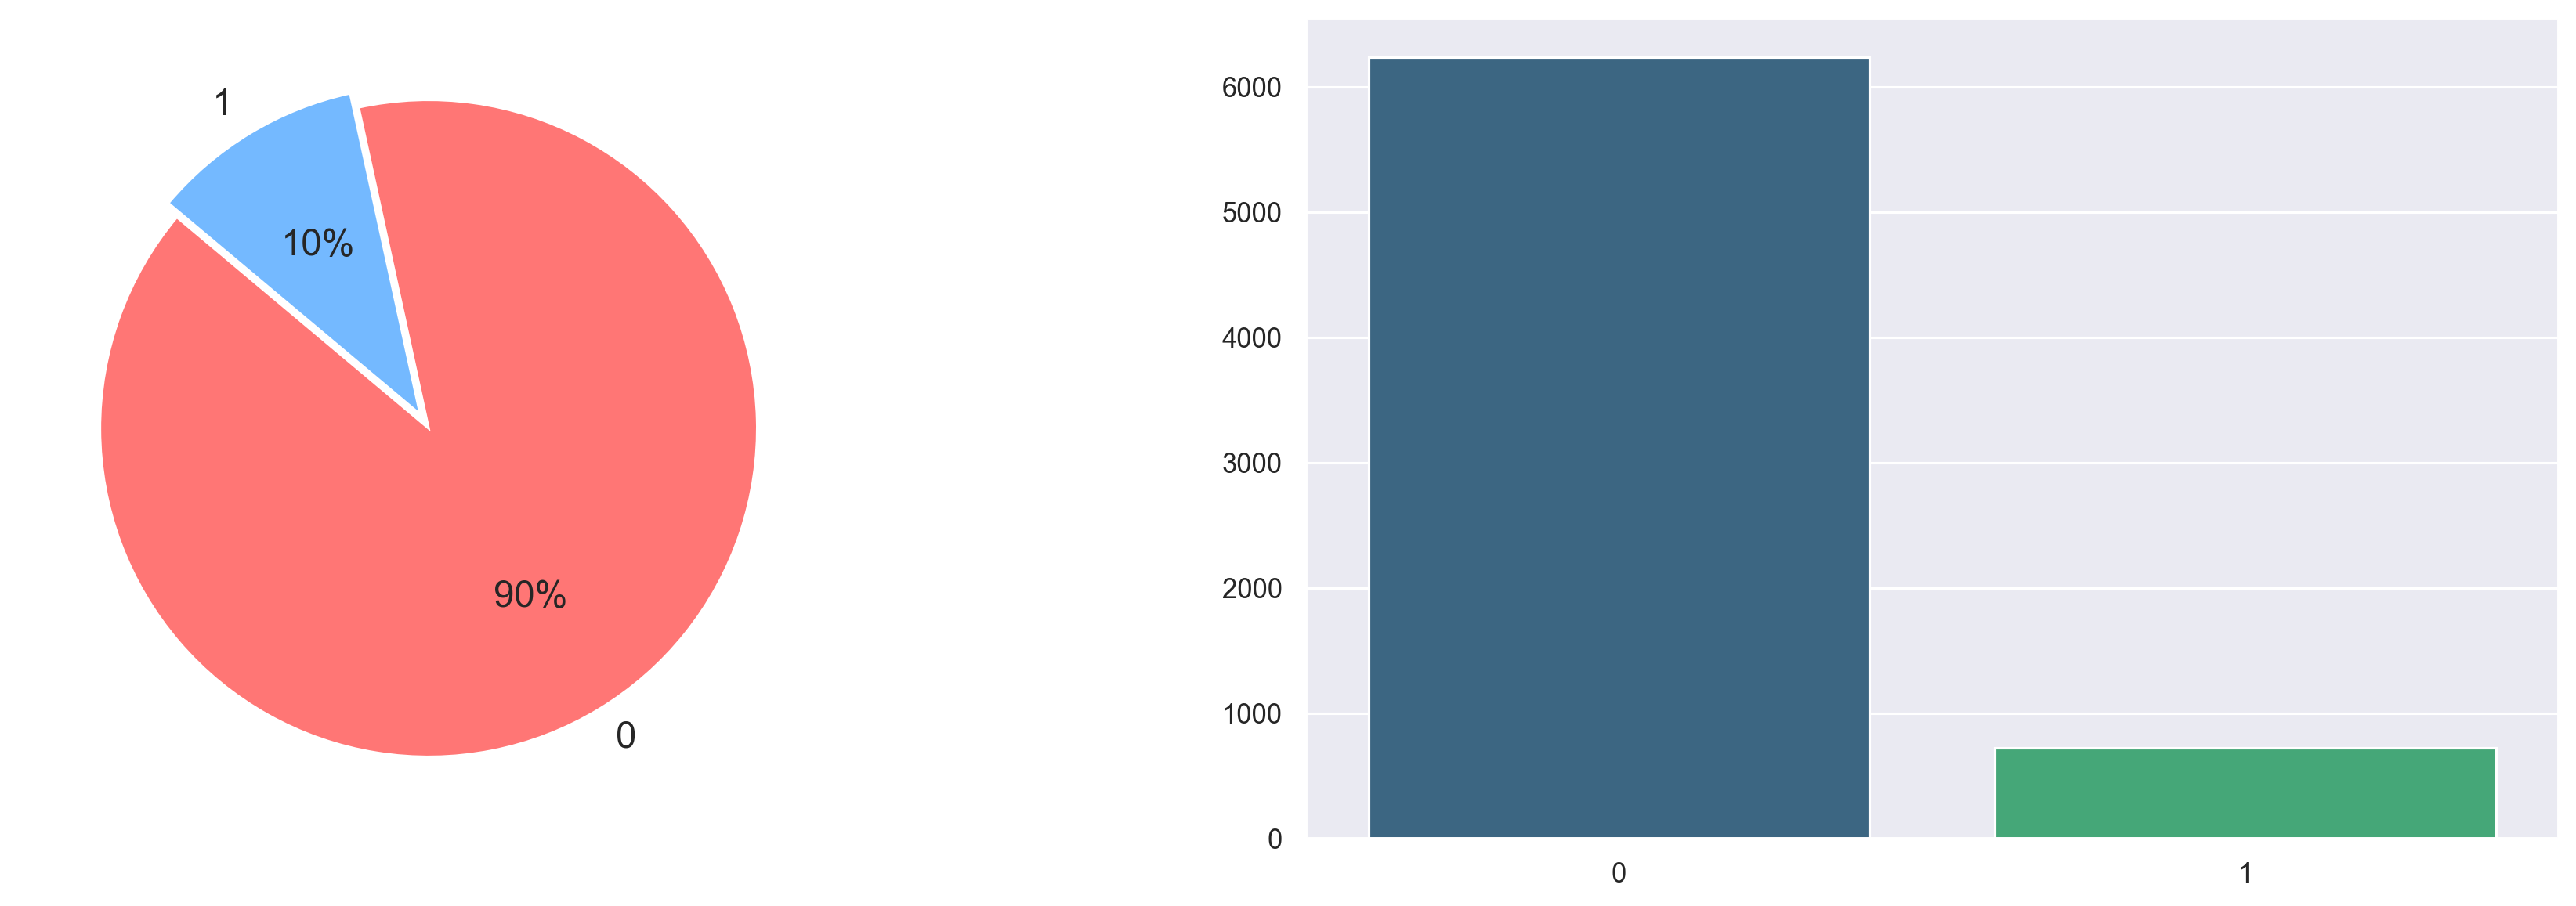

In [47]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

labels = [0,1]
sizes = [6240, 730]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x=labels,y = sizes, palette= 'viridis')

plt.show()

# Features Engineering

In [48]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data['Total Words'] = data['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

data['Total Chars'] = data["text"].apply(count_total_words)

In [49]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data.head()

,text,label,Total Words,Total Chars
0,oh my gosh,1.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14,65
3,I've shifted my focus to something else but I'...,1.0,11,51
4,"I'm restless and restless, it's been a month n...",1.0,14,59


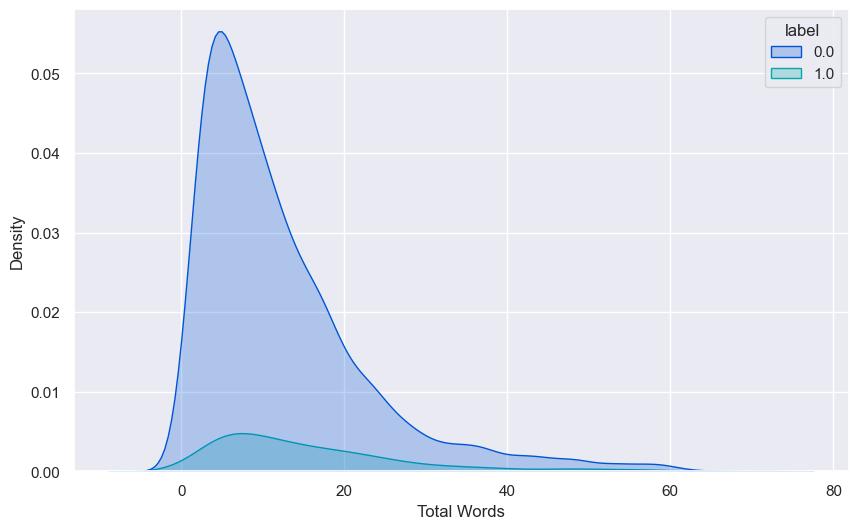

In [50]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Words'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

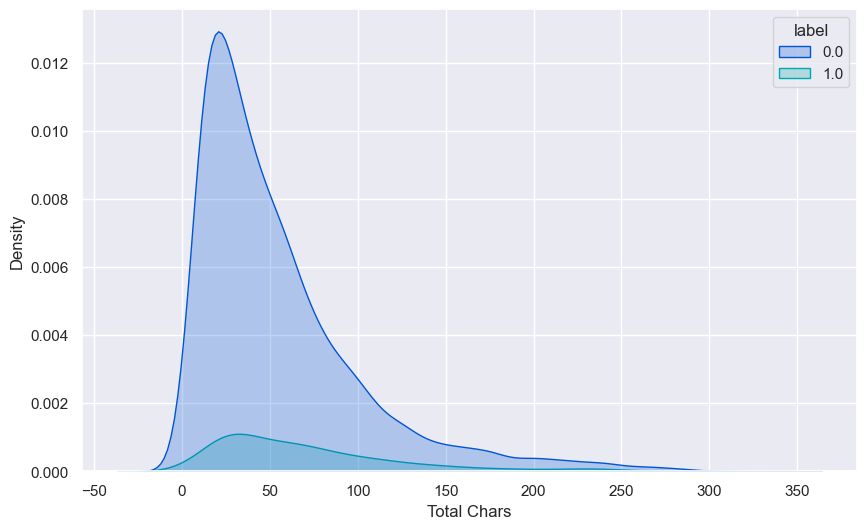

In [51]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Chars'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

# Text Preprocessing

In [52]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data.head()

,text,label,Total Words,Total Chars
0,oh my gosh,1.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14,65
3,I've shifted my focus to something else but I'...,1.0,11,51
4,"I'm restless and restless, it's been a month n...",1.0,14,59


In [53]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def convert_lowercase(text):
    text = text.lower()
    return text

data['text'] = data['text'].apply(convert_lowercase)

In [54]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

data['text'] = data['text'].apply(remove_url)

In [55]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

data['text'] = data['text'].apply(remove_punc)

In [56]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

data['text'] = data['text'].apply(remove_stopwords)

In [57]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

data['text'] = data['text'].apply(perform_stemming)

In [58]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data['Total Words After Transformation'] = data['text'].apply(lambda x: np.log(len(x.split())))

In [59]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

data.head()

,text,label,Total Words,Total Chars,Total Words After Transformation
0,oh gosh,1.0,3,8,0.693147
1,troubl sleep confus mind restless heart tune,1.0,10,55,1.945910
2,wrong back dear forward doubt stay restless re...,1.0,14,65,2.197225
3,ive shift focu someth els im still worri,1.0,11,51,2.079442
4,im restless restless month boy mean,1.0,14,59,1.791759


# Visualization

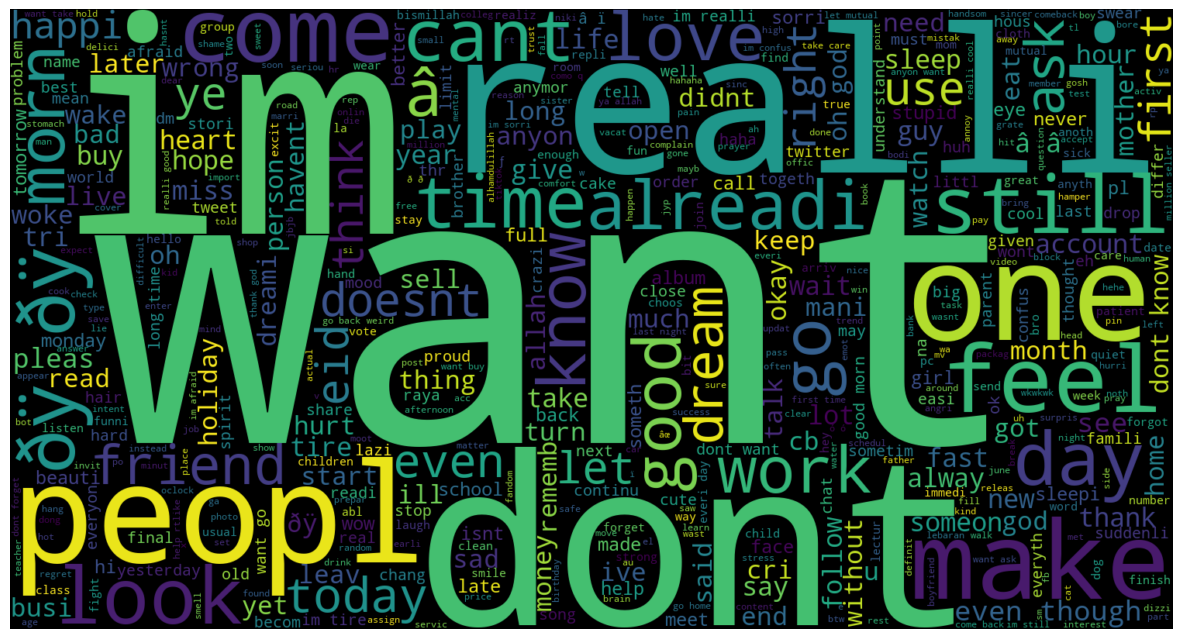

In [60]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

text = " ".join(data[data['label'] == 0]['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

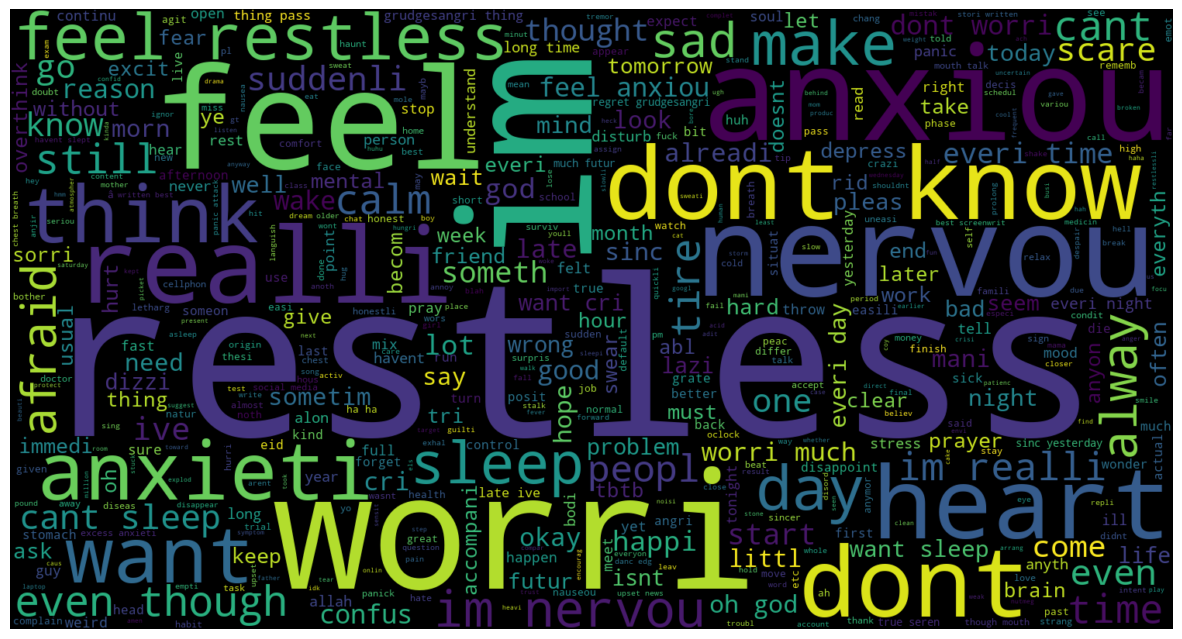

In [61]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

text = " ".join(data[data['label'] == 1]['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

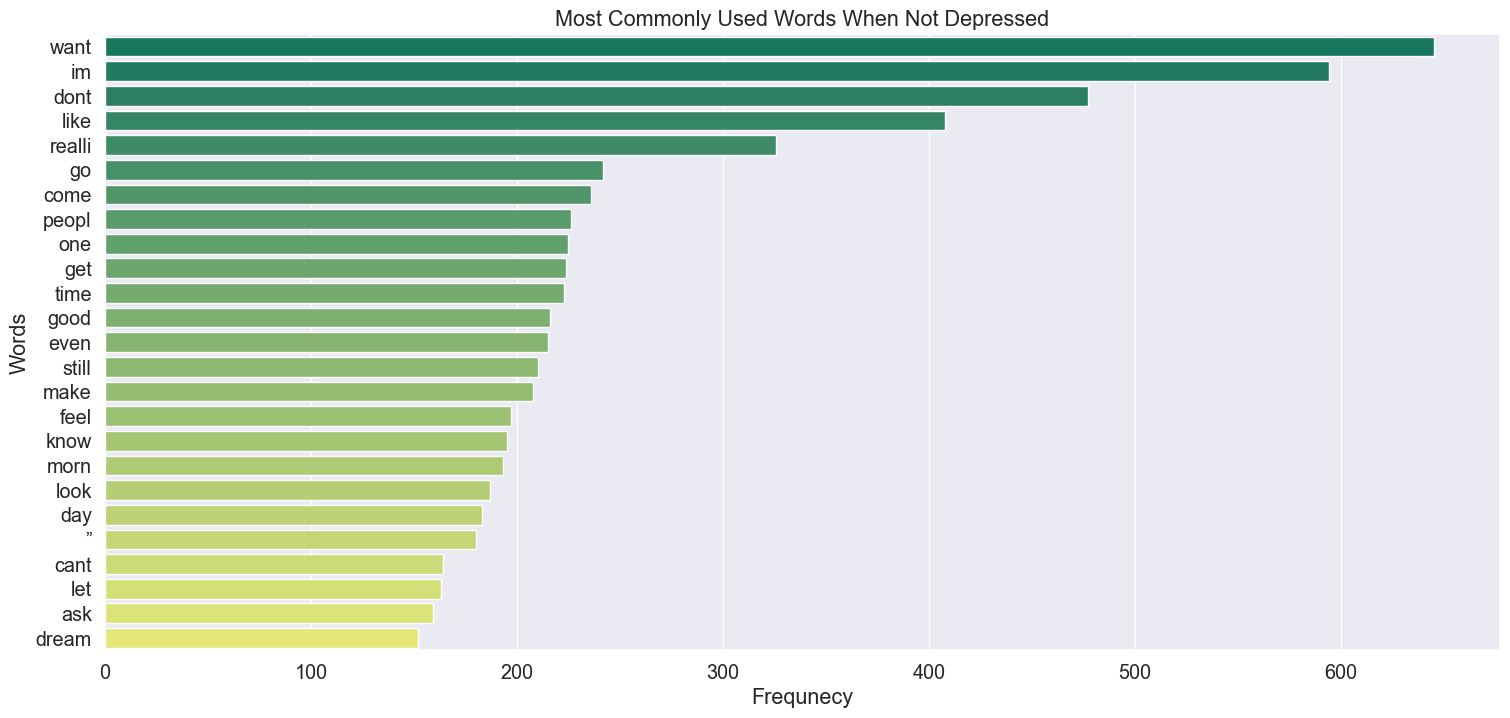

In [62]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_nodep_words = []
for sentence in data[data['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Not Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

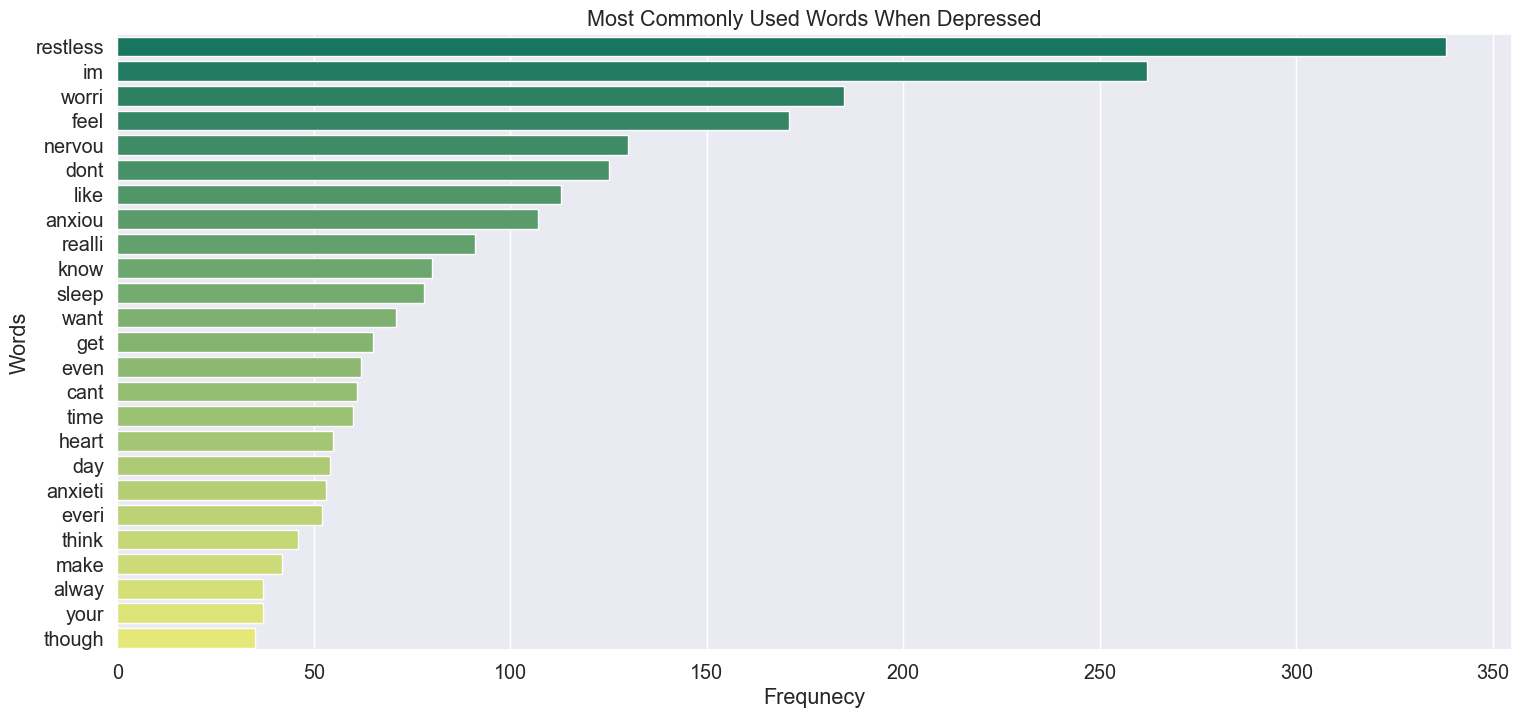

In [63]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_dep_words = []
for sentence in data[data['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

df = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

# Vectorization

In [64]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

X = data["text"]
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [65]:
type(X_test)

pandas.core.series.Series

In [66]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [67]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Modeling

In [68]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

Accuracy of the model: 0.934
Precision Score of the model: 1.0
Recall Score of the model: 0.374


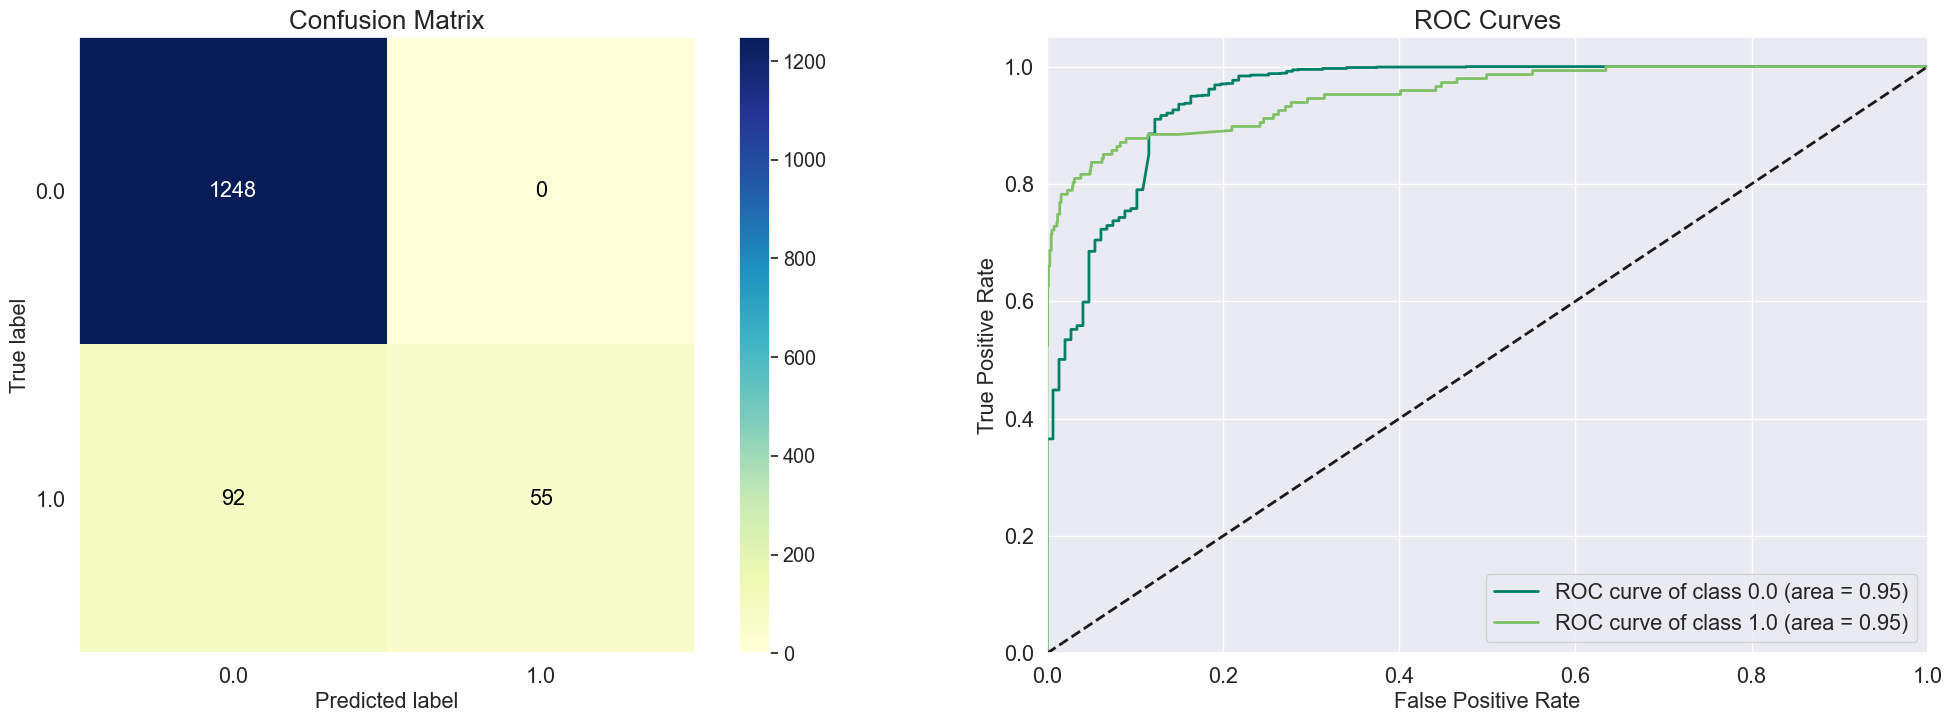

In [69]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

nb = MultinomialNB()
train_model(nb)

Accuracy of the model: 0.991
Precision Score of the model: 0.979
Recall Score of the model: 0.932


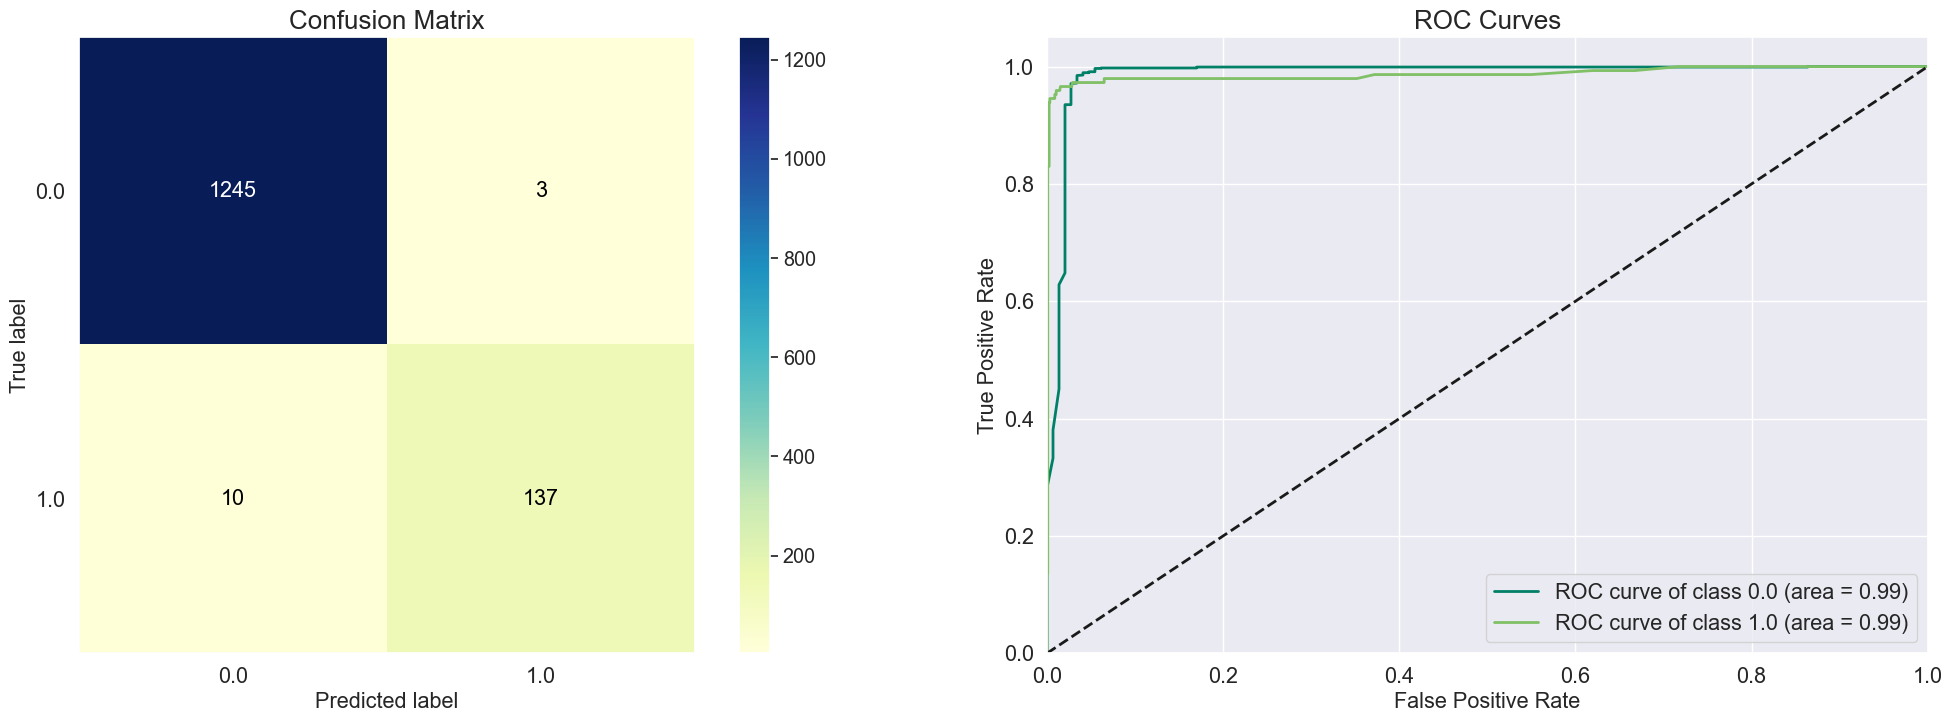

In [70]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

rf = RandomForestClassifier(n_estimators= 300)
train_model(rf)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Accuracy of the model: 0.965
Precision Score of the model: 0.99
Recall Score of the model: 0.673


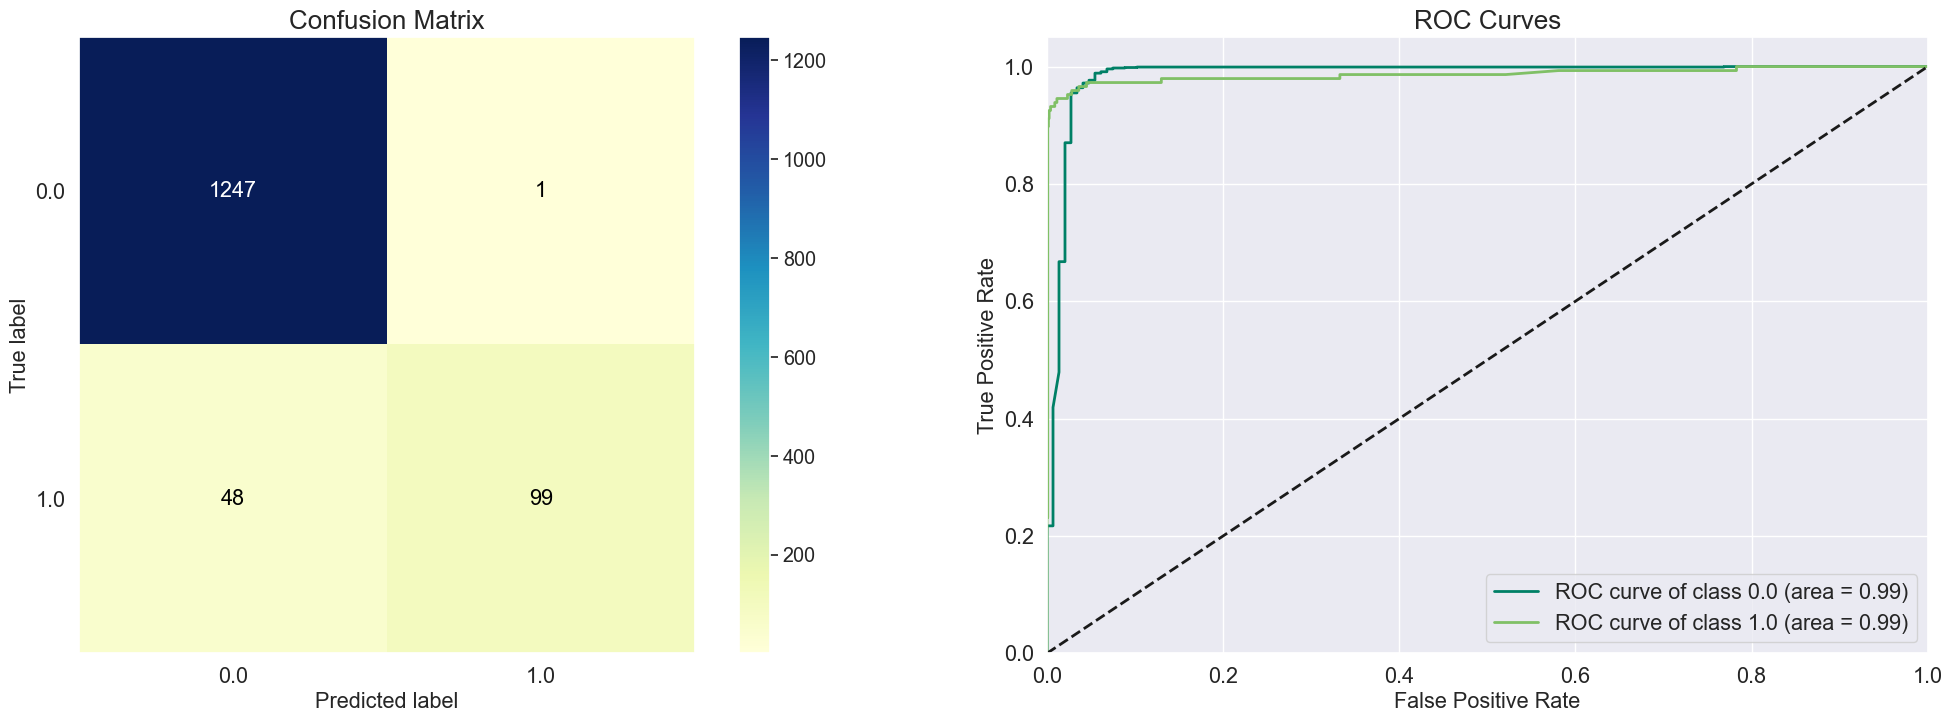

In [72]:
lr = LogisticRegression()
train_model(lr)

Accuracy of the model: 0.915
Precision Score of the model: 0.967
Recall Score of the model: 0.197


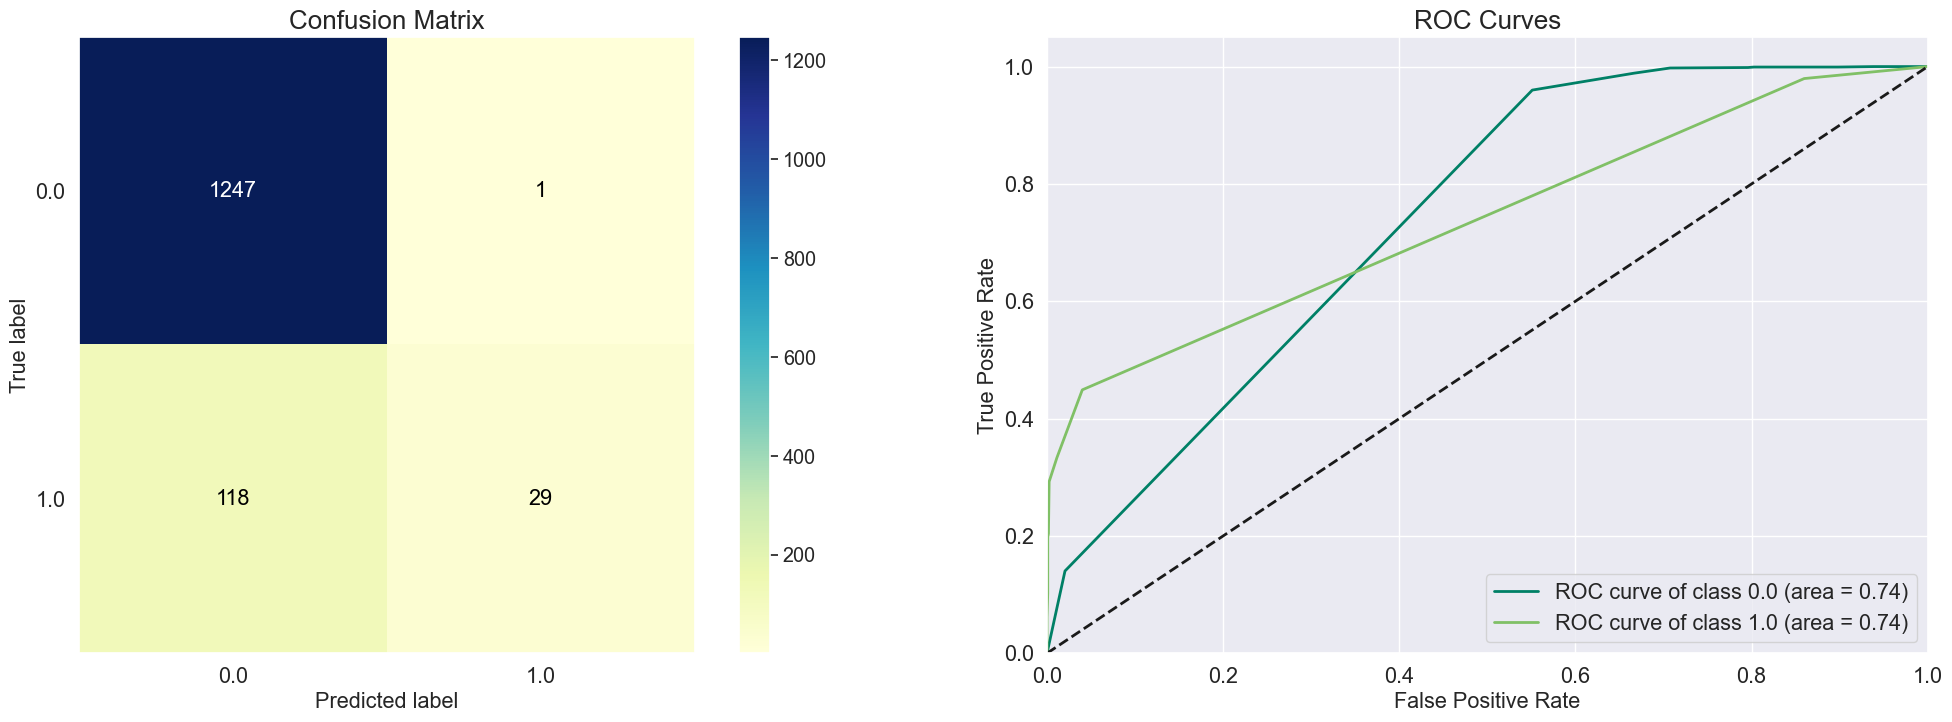

In [73]:
knc = KNeighborsClassifier(n_neighbors=10)
train_model(knc)

Accuracy of the model: 0.994
Precision Score of the model: 0.993
Recall Score of the model: 0.946


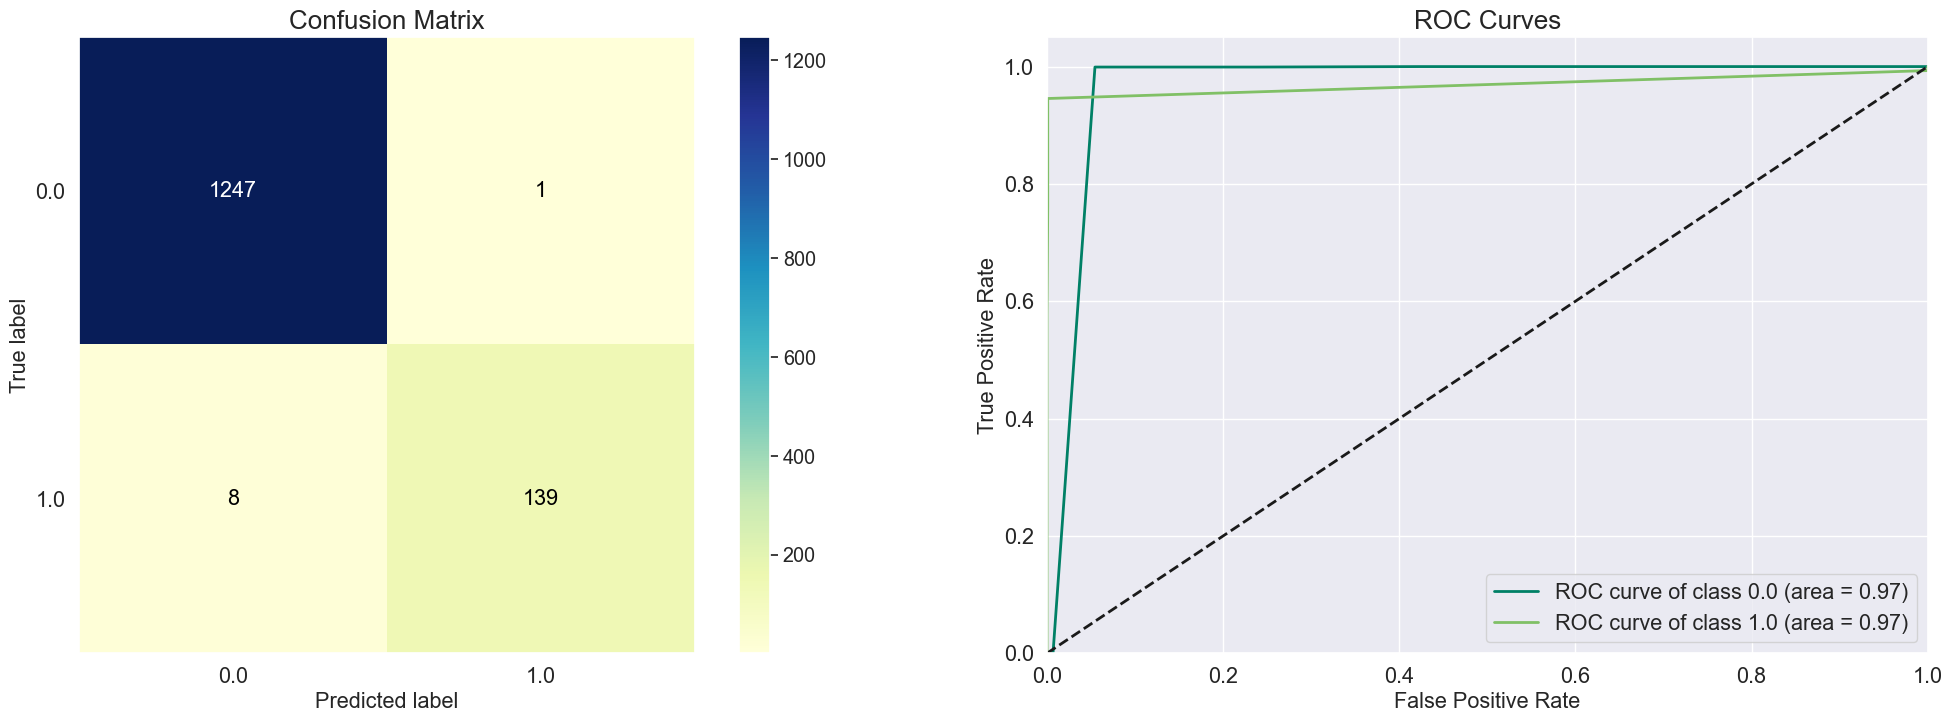

In [74]:
dt = DecisionTreeClassifier(max_depth=5)
train_model(dt)

In [81]:
new_d_arr = ["I can't sleep as I have anxiety about the future"]
new_d = tfidf.transform(new_d_arr).toarray()

In [82]:
new_d

array([[0., 0., 0., ..., 0., 0., 0.]])

In [83]:
prediction = rf.predict(new_d)
print(prediction)

[0.]
